<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Тариф-«Смарт»" data-toc-modified-id="Тариф-«Смарт»-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Тариф «Смарт»</a></span></li><li><span><a href="#Тариф-«Ультра»" data-toc-modified-id="Тариф-«Ультра»-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Тариф «Ультра»</a></span></li><li><span><a href="#Шаг-1.-Знакомство-с-данными" data-toc-modified-id="Шаг-1.-Знакомство-с-данными-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 1. Знакомство с данными</a></span></li><li><span><a href="#Шаг-2.-Подготовка-данных" data-toc-modified-id="Шаг-2.-Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 2. Подготовка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-тарифа-&quot;Смарт&quot;" data-toc-modified-id="Анализ-тарифа-&quot;Смарт&quot;-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ тарифа "Смарт"</a></span></li><li><span><a href="#Анализ-тарифа--&quot;Ультра&quot;" data-toc-modified-id="Анализ-тарифа--&quot;Ультра&quot;-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Анализ тарифа  "Ультра"</a></span></li></ul></li><li><span><a href="#Шаг-4.-Проверка-гипотез" data-toc-modified-id="Шаг-4.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 4. Проверка гипотез</a></span></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Шаг 5. Общий вывод</a></span></li></ul></div>

# Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание тарифов 

## Тариф «Смарт» 
Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

  * минута разговора: 3 рубля

  * сообщение: 3 рубля

  * 1 Гб интернет-трафика: 200 рублей
  
  
## Тариф «Ультра»
Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:

   * минута разговора: 1 рубль

   * сообщение: 1 рубль

   * 1 Гб интернет-трафика: 150 рублей

## Шаг 1. Знакомство с данными

Подключаем необходимые библиотеки

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set(color_codes=True)
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st

Читаем файлы в переменные с параметром parse_dates, который позволяет перевести сразу необходимые  столбцы в формат datetime

In [30]:
calls = pd.read_csv('/datasets/calls.csv', parse_dates=['call_date'])
internet= pd.read_csv('/datasets/internet.csv', parse_dates=['session_date'],index_col=0)
messages = pd.read_csv('/datasets/messages.csv',parse_dates=['message_date'])
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv',parse_dates=['reg_date'])

Посмотрим данные и оценим что с ними необходимо сделать

In [31]:
for i in [calls,internet, messages,tariffs,users]:
    print(i.info(), '\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB
None 


<class '

## Шаг 2. Подготовка данных

Далее для предовтращения появления неявных дубликатов, приведём к нижнему регистру все буквенные столбцы

In [34]:
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
users['tariff'] = users['tariff'].str.lower()

Добавим столбец с номером месяца

In [35]:
calls['month'] = calls['call_date'].astype('datetime64[M]').dt.month
messages['month'] = messages['message_date'].astype('datetime64[M]').dt.month
internet['month'] = internet['session_date'].astype('datetime64[M]').dt.month

Теперь проверим на наличие явных дубликатов

In [36]:
print(sum(calls.duplicated()))
print(sum(internet.duplicated()))
print(sum(messages.duplicated()))
print(sum(tariffs.duplicated()))
print(sum(users.duplicated()))

0
0
0
0
0


Создадим функцию для округления количества использованного интернета. Если число делится на тысячу двадцать четыре  с остатком, то к целой части полученного числа прибавляется 1 и умножается на тысячу. Если же число делится на тысячу двадцать четыре без остатка, то возвращается целая полученного после деления числа, умноженная на тысячу

In [37]:
def used_int (mb_used):
    if mb_used % 1024 != 0:
        return ((mb_used // 1024) + 1) *1000
    else:
        return ((mb_used // 1024)) *1000

Чтобы не преобразовывать исходный датасет скопируем его в новую переменную с которой будем работать. Далее содаём новый столбец 'duration_for_operator' который показывает сколько минут разговаривал пользователь для оператору. Оператору всё равно на десятые и сотые времени звонка, он округляет эти значения до целых в большую сторону. Далее группируем получившуюся таблицу по месяцу и по id пользователя, применяя к каждому из столбцов необходимую функцию.

## Шаг 3. Исследовательский анализ данных

In [38]:
call = calls.copy()
call['duration_for_operator'] = np.ceil(calls['duration']).astype(int)
grouped_calls = call.groupby(['user_id','month']).agg({'id': 'count', 'duration_for_operator' : 'sum'})
grouped_calls = grouped_calls.rename(columns = {'id':'calls'})

Проделываем с таблицей internet тоже самое, округляя количество использованного трафика за месяц

In [39]:
inter = internet.copy()
grouped_internet = inter.groupby(['user_id','month'],).agg({'mb_used':'sum'})
grouped_internet['mb_used_for_operator'] = grouped_internet['mb_used'].apply(used_int)

И с таблицей message тоже самое подсчитывая количество сообщений в каждом месяце

In [40]:
message = messages.copy()
grouped_message = message.groupby(['user_id','month']).agg({'id':'count'})
grouped_message = grouped_message.rename(columns = {'id': 'messages'})

Объединяем все три сводные таблицы в одну

In [41]:
dfs = [grouped_calls, grouped_internet, grouped_message]
grouped_data = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), dfs)

Удаляем NaN-ы во всех столбцах, а также в необходимых столбцам заменяем значения на тип int 

In [42]:
grouped_data['duration_for_operator'] = grouped_data['duration_for_operator'].fillna(0).astype(int)
grouped_data['messages'] = grouped_data['messages'].fillna(0).astype(int)
grouped_data['mb_used'] = grouped_data['mb_used'].fillna(0).astype(int)
grouped_data['mb_used_for_operator'] = grouped_data['mb_used_for_operator'].fillna(0).astype(int)
grouped_data['calls'] = grouped_data['calls'].fillna(0).astype(int)

Добавим наименование используемого тарифа для каждого пользователя

In [43]:
for user in grouped_data.index:
    grouped_data.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

Создадим функцию, которая подсчитает количество выручки для каждого пользователя в месяц

In [44]:
def det_revenue(row):
    # вытаскиваем из датасета нужные столбцы и присваиваем их переменным с соответсвующими названиями
    messages = row['messages']
    mb_used_for_operator = row['mb_used_for_operator']
    tariff = row['tariff']
    duration_for_operator = row['duration_for_operator']
    calls = row['calls']
    
       # работа со столбцами если тариф у пользователя smart
    if tariff == 'smart':
        extra_duration = duration_for_operator - tariffs.loc[0, 'minutes_included'] # вычисляем сколько пользователь 
        # проговорил сверх выделенных минут в тарифе
        extra_mb = mb_used_for_operator - tariffs.loc[0, 'mb_per_month_included'] # вычисляем сколько пользователь использовал
        # трафика сверх выделенного в тарифе
        extra_messages = messages - tariffs.loc[0, 'messages_included'] # вычисляем сколько сообщений пользователь отправил
        # сверх выделенных тарифом
        
        return (np.where(extra_duration > 0 ,extra_duration * tariffs.loc[0, 'rub_per_minute'], 0) +
                np.where(extra_mb > 0 ,extra_mb * (tariffs.loc[0, 'rub_per_gb'] /1024), 0) + 
                np.where(extra_messages > 0 ,extra_messages * tariffs.loc[0, 'rub_per_message'], 0) +
                tariffs.loc[0, 'rub_monthly_fee'])
    
    else:
        extra_duration = duration_for_operator - tariffs.loc[1, 'minutes_included'] # вычисляем сколько пользователь 
        # проговорил сверх выделенных минут в тарифе
        extra_mb = mb_used_for_operator - tariffs.loc[1, 'mb_per_month_included'] # вычисляем сколько пользователь использовал
        # трафика сверх выделенного в тарифе
        extra_messages = messages - tariffs.loc[1, 'messages_included'] # вычисляем сколько сообщений пользователь отправил
        # сверх выделенных тарифом
        
        return (np.where(extra_duration > 0 ,extra_duration * tariffs.loc[1, 'rub_per_minute'], 0) +
                np.where(extra_mb > 0 ,extra_mb * (tariffs.loc[1, 'rub_per_gb'] /1024), 0) + 
                np.where(extra_messages > 0 ,extra_messages * tariffs.loc[1, 'rub_per_message'], 0) +
                tariffs.loc[1, 'rub_monthly_fee'])      

In [45]:
grouped_data['revenue'] = grouped_data.apply(det_revenue, axis=1) # применяем функцию ко всему датасету
grouped_data.head()

calls  duration_for_operator  mb_used  mb_used_for_operator  \
user_id month                                                                
1000    5         22                    159     2253                  3000   
        6         43                    172    23233                 23000   
        7         47                    340    14003                 14000   
        8         52                    408    14055                 14000   
        9         58                    466    14568                 15000   

               messages tariff  revenue  
user_id month                            
1000    5            22  ultra   1950.0  
        6            60  ultra   1950.0  
        7            75  ultra   1950.0  
        8            81  ultra   1950.0  
        9            57  ultra   1950.0

### Анализ тарифа "Смарт"

Достаём из получившейся таблицы пользователей использующих тариф smart

In [46]:
smart_grouped_data = grouped_data[grouped_data['tariff'] == 'smart']

Для сгруппированной таблицы пользователей тарифа "Смарт" вычисляем медиану, дисперсию и стандартное отклонение для каждого столбца и группируем по месяцам

In [47]:
smr_med_std_var = smart_grouped_data.pivot_table(index = 'month',
                                             
                                            values = ['duration_for_operator','messages','mb_used_for_operator'],
                                             
                                             aggfunc = {'duration_for_operator' : [np.median , np.var ,np.std],
                                                        'messages'              : [np.median , np.var ,np.std],
                                                        'mb_used_for_operator'  : [np.median , np.var ,np.std]}
                                                )
smr_med_std_var.head()

duration_for_operator                           mb_used_for_operator  \
                     median         std           var               median   
month                                                                        
1                     162.5  154.231454  23787.341355               7000.0   
2                     258.0  190.820041  36412.287961              13000.0   
3                     409.0  191.893604  36823.155161              16000.0   
4                     368.5  186.489161  34778.207127              14000.0   
5                     433.0  186.601343  34820.061094              16000.0   

                                 messages                         
               std           var   median        std         var  
month                                                             
1      6277.949982  3.941266e+07     15.0  16.197753  262.367201  
2      6095.156904  3.715094e+07     20.0  21.750809  473.097701  
3      5705.251745  3.254990e+07     23.0  26.804710  718.492481  
4      5594.600035  3.129955e+07     28.0  24.538532  602.139559  
5      5862.594147  3.437001e+07     30.0  27.036845  730.990983

Выводим графики зависимостей продолжительности разговора, использованного интернета и количества отправленных сообщений от номера месяца

Text(0.5, 0.98, 'Тариф Смарт')

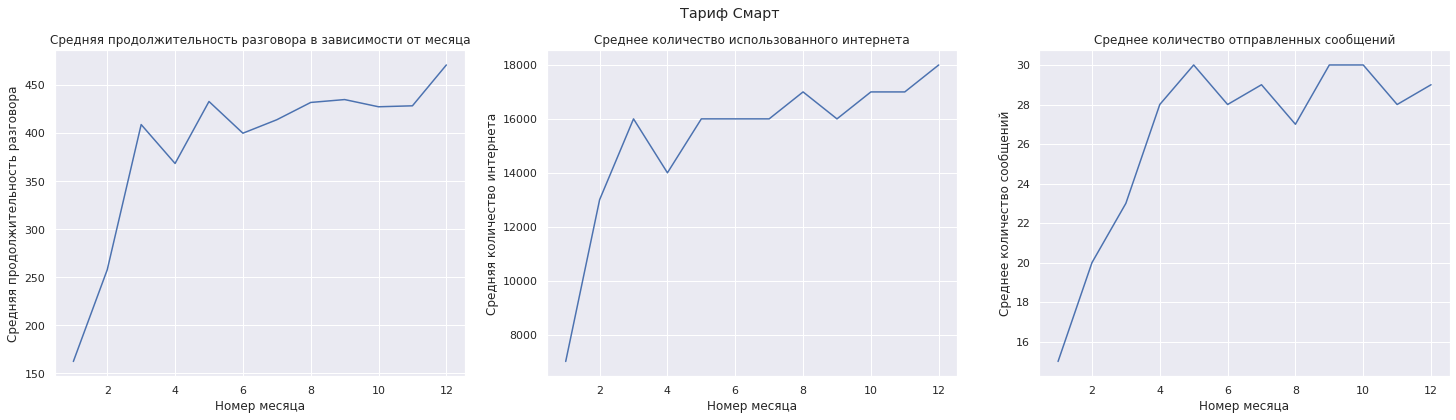

In [48]:
f, axs = plt.subplots (1,3,figsize=(25,6))

axs[0].plot(smr_med_std_var['duration_for_operator','median'])
axs[0].set_title("Средняя продолжительность разговора в зависимости от месяца")
axs[0].set_xlabel("Номер месяца")
axs[0].set_ylabel("Средняя продолжительность разговора")


axs[1].plot(smr_med_std_var['mb_used_for_operator','median'])
axs[1].set_title("Среднее количество использованного интернета")
axs[1].set_xlabel("Номер месяца")
axs[1].set_ylabel("Средняя количество интернета")


axs[2].plot(smr_med_std_var['messages','median'])
axs[2].set_title("Среднее количество отправленных сообщений")
axs[2].set_xlabel("Номер месяца")
axs[2].set_ylabel("Среднее количество сообщений")

plt.suptitle('Тариф Смарт')

Как мы видим, средняя продолжительность разговора в месяц резко растёт с января по март, а далее держится примерно на одном уровне так как среднее колеблется от 400 до 450 минут в месяц. Тоже самое происходит и с интернет трафиком и отправленными сообщениями, объём которых резко растёт с января до марта, а далее средний израсходованный интернет трафик держится между 16 и 18 гб в месяц, а количество сообщений между 28 и 30 сообщениями в месяц

Теперь построим гистограммы распределения необходимых нам величин

Text(0.5, 0.98, 'Тариф Смарт')

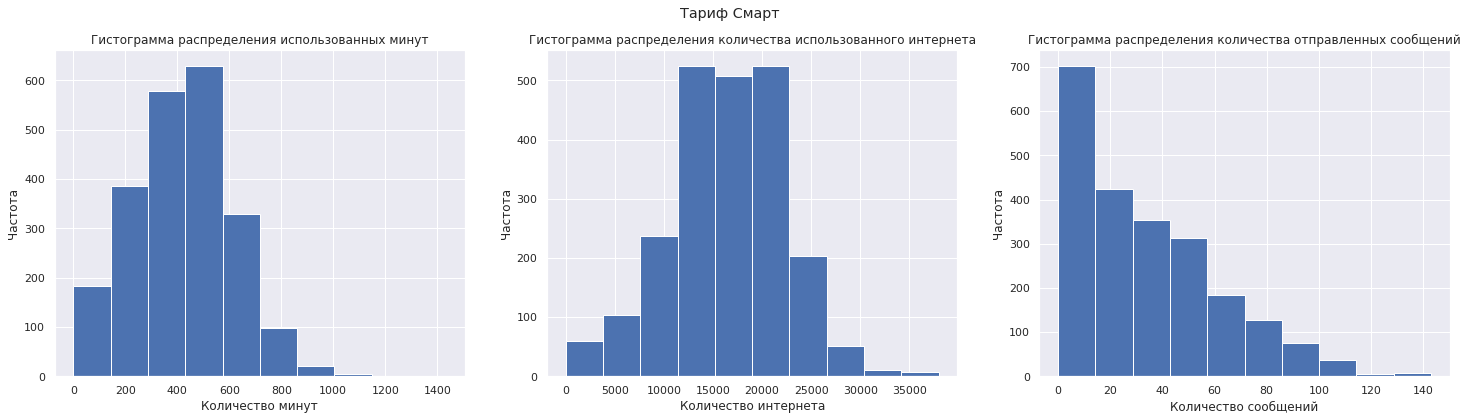

In [49]:
f, axs = plt.subplots (1,3,figsize=(25,6))

axs[0].hist(smart_grouped_data['duration_for_operator'])
axs[0].set_title("Гистограмма распределения использованных минут")
axs[0].set_xlabel("Количество минут")
axs[0].set_ylabel("Частота")


axs[1].hist(smart_grouped_data['mb_used_for_operator'])
axs[1].set_title("Гистограмма распределения количества использованного интернета")
axs[1].set_xlabel("Количество интернета")
axs[1].set_ylabel("Частота")


axs[2].hist(smart_grouped_data['messages'])
axs[2].set_title("Гистограмма распределения количества отправленных сообщений")
axs[2].set_xlabel("Количество сообщений")
axs[2].set_ylabel("Частота")

plt.suptitle('Тариф Смарт')


###### Гистограмма распределения использованных минут

Это нормальное, скошенное вправо распределение. Как мы видим, чаще всего люди разговаривают от 400 до 600 минут в месяц и сильно реже разговаривают 100 - 200 минут и совсем редко 700 - 900 минут

###### Гистограмма распределения использованного интернета
Это тоже нормальное распределение, только уже не скошенное. Люди, использующие тариф Смарт, чаще всего используют или почти весь, или весь трафик интернета и немного доплачивают за дополнительные 5 гб. То есть от 10 до 20 гб

###### Гистограмма распределения отправленных сообщений
Это распределение Пуассона. Как мы видим, чаще всего люди люди в месяц присылают до 20 сообщений, далее количество встречающихся значений с увеличением числа сообщений снижается

### Анализ тарифа  "Ультра"

Выделяем из сгруппированных данных пользователей тарифа "Ультра

In [50]:
ultra_grouped_data = grouped_data[grouped_data['tariff'] == 'ultra']
ultra_grouped_data.head()

calls  duration_for_operator  mb_used  mb_used_for_operator  \
user_id month                                                                
1000    5         22                    159     2253                  3000   
        6         43                    172    23233                 23000   
        7         47                    340    14003                 14000   
        8         52                    408    14055                 14000   
        9         58                    466    14568                 15000   

               messages tariff  revenue  
user_id month                            
1000    5            22  ultra   1950.0  
        6            60  ultra   1950.0  
        7            75  ultra   1950.0  
        8            81  ultra   1950.0  
        9            57  ultra   1950.0

Находим медиану,дисперсию и стандартное отклонение для каждой из величин в таблице пользователей тарифа "Ультра"

In [51]:
ult_med_std_var = ultra_grouped_data.pivot_table(index = 'month',
                                             
                                            values = ['duration_for_operator','messages','mb_used_for_operator'],
                                             
                                             aggfunc = { 'duration_for_operator' : [np.median , np.var ,np.std],
                                                        'messages' : [np.median , np.var ,np.std],
                                                        'mb_used_for_operator' : [np.median , np.var ,np.std]
                                                 
                                             })
ult_med_std_var.head()

duration_for_operator                            mb_used_for_operator  \
                     median         std            var               median   
month                                                                         
1                     382.0  269.757968   72769.361111              15000.0   
2                     168.0  296.512528   87919.679348               7500.0   
3                     403.0  333.743765  111384.900901              18000.0   
4                     453.0  267.682405   71653.870034              17000.0   
5                     519.0  289.603511   83870.193578              19000.0   

                                  messages                          
                std           var   median        std          var  
month                                                               
1       6666.666667  4.444444e+07     32.0  30.670742   940.694444  
2      10446.551334  1.091304e+08      5.5  26.773574   716.824275  
3      10693.238300  1.143453e+08     20.0  41.621886  1732.381381  
4       9457.436103  8.944310e+07     17.0  37.513831  1407.287542  
5       9779.130253  9.563139e+07     25.0  40.306874  1624.644052

Строим графики зависимости необходимых величин он номера месяца

Text(0.5, 0.98, 'Тариф Ультра')

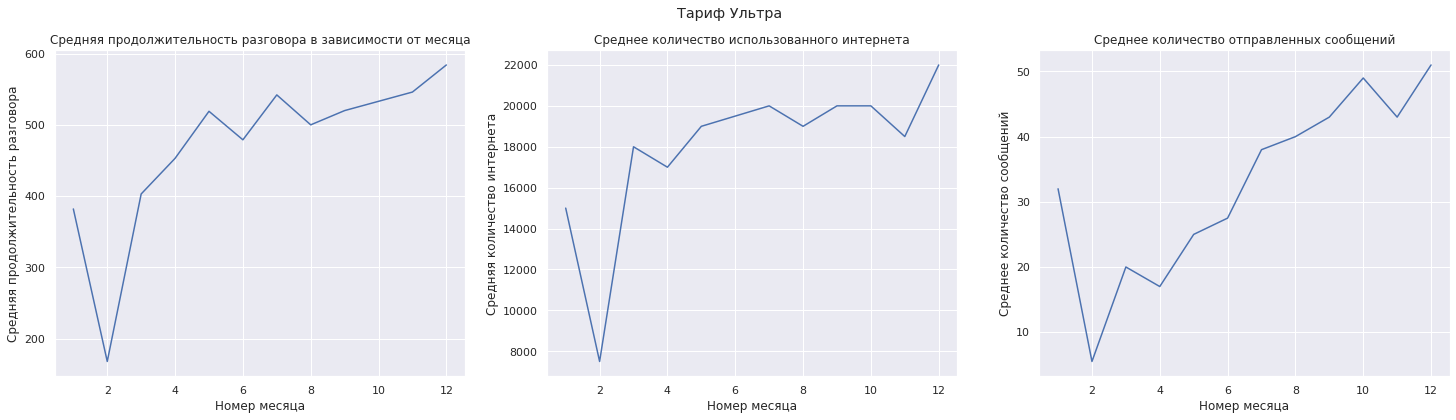

In [52]:
f, axs = plt.subplots (1,3,figsize=(25,6))

axs[0].plot(ult_med_std_var['duration_for_operator','median'])
axs[0].set_title("Средняя продолжительность разговора в зависимости от месяца")
axs[0].set_xlabel("Номер месяца")
axs[0].set_ylabel("Средняя продолжительность разговора")


axs[1].plot(ult_med_std_var['mb_used_for_operator','median'])
axs[1].set_title("Среднее количество использованного интернета")
axs[1].set_xlabel("Номер месяца")
axs[1].set_ylabel("Средняя количество интернета")


axs[2].plot(ult_med_std_var['messages','median'])
axs[2].set_title("Среднее количество отправленных сообщений")
axs[2].set_xlabel("Номер месяца")
axs[2].set_ylabel("Среднее количество сообщений")

plt.suptitle('Тариф Ультра')

Как видно, люди с самого начала года достаточно много пользуются интернетом,связью и сообщениями, далее количество резко снижается, почти до нуля во втором месяце, и далее снова рост, до средних чисел. Продолжительность звонков это от 500 до 600 минут, количествно использованного трафика от 18 до 20 гб, количество сообщений от 20 до 50

Строим гистограммы

Text(0.5, 0.98, 'Тариф Ультра')

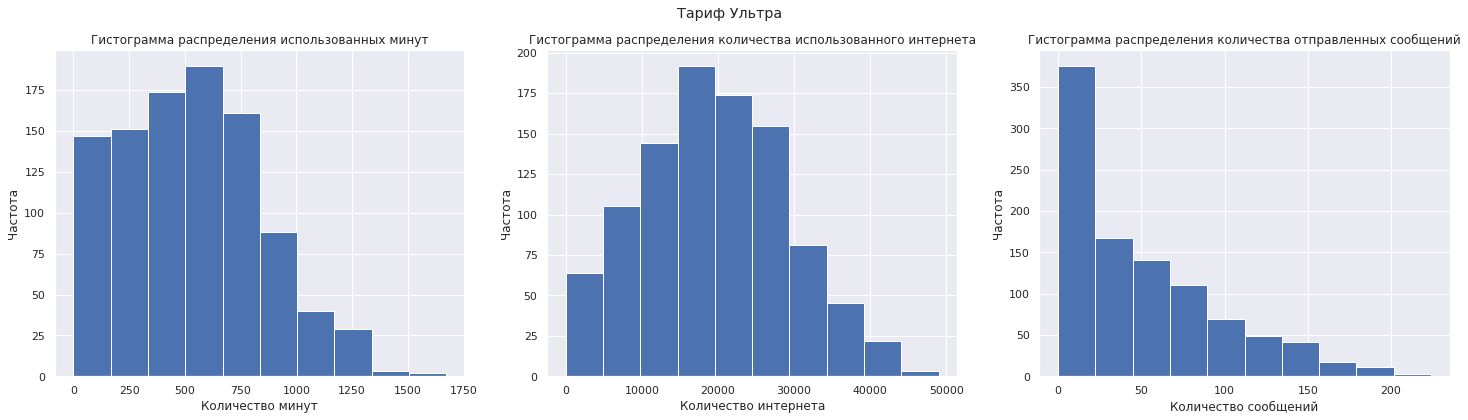

In [53]:
f, axs = plt.subplots (1,3,figsize=(25,6))

axs[0].hist(ultra_grouped_data['duration_for_operator'])
axs[0].set_title("Гистограмма распределения использованных минут")
axs[0].set_xlabel("Количество минут")
axs[0].set_ylabel("Частота")


axs[1].hist(ultra_grouped_data['mb_used_for_operator'])
axs[1].set_title("Гистограмма распределения количества использованного интернета")
axs[1].set_xlabel("Количество интернета")
axs[1].set_ylabel("Частота")


axs[2].hist(ultra_grouped_data['messages'])
axs[2].set_title("Гистограмма распределения количества отправленных сообщений")
axs[2].set_xlabel("Количество сообщений")
axs[2].set_ylabel("Частота")

plt.suptitle('Тариф Ультра')

###### Гистограмма распределения использованных минут

Это нормальное, скошенное вправо распределение. Как мы видим, чаще всего люди разговаривают от 500 до 700 минут в месяц, но также и достаточно часто разговаривают от 250 до 500 минут. Однако, больше 800 минут люди разговаривают достаточно редко

###### Гистограмма распределения использованного интернета

Это тоже нормальное распределение, только уже не скошенное. Люди, использующие тариф Ультра, чаще всего, расходуют от 15 до 30 гигабайт интернета в месяц. Больше 35 гигабайт люди используют уже достаточно редко.

###### Гистограмма распределения отправленных сообщений

Это распределение Пуассона. Как мы видим, чаще всего люди люди в месяц присылают до 25 сообщений, далее количество встречающихся значений с увеличением числа сообщений снижается

Формируем гипотезы которые необходимо будет проверить. Обычно для формирования нулевой гипотезы применяется понятие "одно равно другому" или "параметр равен числу" и альтернативная гипотеза подразумевает отличие различия двух параметров или отличие исследуемого параметра от конкретного числа

Text(0.5, 0.98, 'Тариф Смарт')

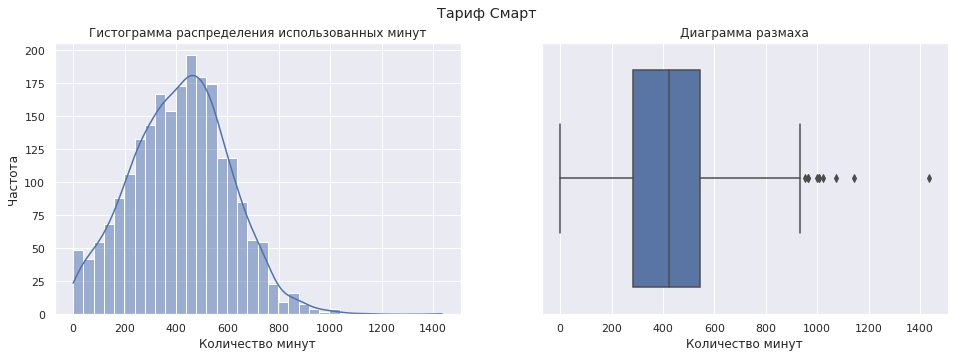

In [98]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(smart_grouped_data['duration_for_operator'],ax = axes[0], kde = True)
axes[0].set_title("Гистограмма распределения использованных минут")
axes[0].set_xlabel("Количество минут")
axes[0].set_ylabel("Частота")


sns.boxplot(x = smart_grouped_data['duration_for_operator'],ax = axes[1])
axes[1].set_title("Диаграмма размаха")
axes[1].set_xlabel("Количество минут")

plt.suptitle('Тариф Смарт')

Text(0.5, 0.98, 'Тариф Ультра')

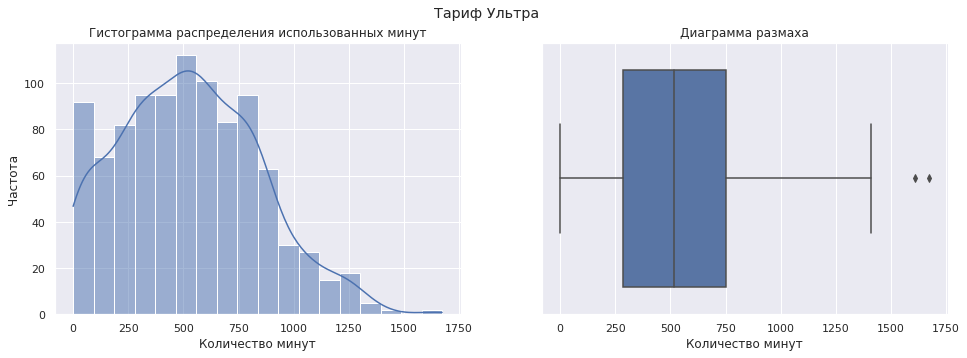

In [99]:
# Создадим одну строку с двумя колонками
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(ultra_grouped_data['duration_for_operator'],ax = axes[0], kde = True)
axes[0].set_title("Гистограмма распределения использованных минут")
axes[0].set_xlabel("Количество минут")
axes[0].set_ylabel("Частота")


sns.boxplot(x = ultra_grouped_data['duration_for_operator'],ax = axes[1])
axes[1].set_title("Диаграмма размаха")
axes[1].set_xlabel("Количество минут")

plt.suptitle('Тариф Ультра')

##  Шаг 4. Проверка гипотез

H0 = Средняя выручка пользователей тарифа "Ультра" и  тарифа "Смарт" одинаковая 

H1 = Средняя выручка различается

Посмотрим на среднюю выручку пользователей Тарифа "Ультра" и "Смарт"

In [26]:
ultra_grouped_data['revenue'].sort_values().median()

1950.0

In [27]:
smart_grouped_data['revenue'].sort_values().median()

973.0

Далее с помощью теста Левена можно проверить гипотезу о равенстве дисперсий в двух генеральных совокупностях. 

In [95]:
alpha = .05

dispersion = st.levene(
    ultra_grouped_data['revenue'], 
    smart_grouped_data['revenue'],)


print('p-value:', dispersion.pvalue)

if (dispersion.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 2.289568715604391e-122
Отвергаем нулевую гипотезу


И как мы видим, вероятно, различия в дисперсиях не случайны и они действительно не равны

Далее для проверки гипотезы о равенстве двух средних в  выборках используем t-тест. Используем функцию "st.ttest_ind" так как мы  точно не знаем равны ли дисперсии у данных выборок и  мы точно знаем, что выборки не равны по объёму, поэтому используем параметр "equal_var = False". Далее задаём параметр alpha = 0.05. Пятипроцентная точность нас в данном случае устроит. И проверяем

In [28]:
alpha = .05


results = st.ttest_ind(
    ultra_grouped_data['revenue'], 
    smart_grouped_data['revenue'],
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-value: 2.6817309596056453e-301
Отвергаем нулевую гипотезу


Так как получается, что p-value меньше 0.05, мы отвергаем нулевую гипотезу. Это значит, что вероятность получить такие или ещё более значимые различия между средними выручек в тарифах "Ультра" и "Смарт" при условии что H0 верна, менее 5 процентов. Значит, гипотезу а равенстве этих средних, и о том что такие различия мы получили случайно, можно отвергнуть. Эти различия точно не случайны и гипотеза H0 должна быть отвергнута.

Далее проверим гипотезу о том, что средяня выручка пользователей из Москвы не отличается от выручки пользователей других регионов

H0 - Средняя выручка пользователей из Москвы не отличается от пользователей других регионов

H1 - Средняя выручка отличается от пользователей других регионов

Добавим столбец "city" к grouped_data

In [29]:
for user in grouped_data.index:
    grouped_data.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

Здесь мы так же для проверки гипотезы о равенстве двух средних в выборках используем t-тест. И так же используем функцию "st.ttest_ind" так как мы точно не знаем равны ли дисперсии у данных выборок и мы точно знаем, что выборки не равны по объёму, поэтому используем параметр "equal_var = False". Далее задаём параметр alpha = 0.05. Пятипроцентная точность нас в данном случае устроит. Проверяем.

In [30]:
alpha = .05

results = st.ttest_ind(
    grouped_data.query('city == "москва"')['revenue'],
    grouped_data.query('city != "москва"')['revenue'],
    equal_var = False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.4515239530362265
Не получилось отвергнуть нулевую гипотезу


А вот тут отвергнуть нулевую гипотезу не получилось так как p-value сильно больше 0,05, а это значит, что вероятность получить такие или ещё более значимые различия между выручкой московских пользователей и пользователей остальных регионов, при условии что нулевая гипотеза верна, 45 процентов. Значит,любая разница, полученная между средними выручек этих выборок может считаться случайностью и на самом деле они, вероятнее всего, равны.

## Шаг 5. Общий вывод 

В тарифе "Смарт люди предусмотрено 500 минут разговора, 50 сообщений и 15 гб интернета. Люди же в среднем используют около 400-450 минут, около 20 сообщений и 16-17 гб интернета. То есть люди используют практически всё (кроме сообщений) что им выделяется в тарифе, а бывает даже доплачивают за дополнительные гигабайты или минуты и всё равно средняя выручка меньше, чем у тарифа "Ультра"

В тарифе "Ультра" же люди используют около 550-600 минут, когда им выделено 3000! Так же в тариф "Ультра" выходит 30 гб трафика, а люди используют от 15 до 25, то есть ещё остаётся, в среднем, около 5 гб. Про сообщения и говорить не стоит, люди практически не пишут сообщения, хотя они входят в стоимость тарифа. То есть компании "Мегалайн" выгодно, чтобы люди платили за тариф "Ультра" так как, они не расходуют все ресурсы, что им выданы, а платят за всё. Разница в расходуемых минутах, гигабайтах и количестве сообщений не существенная, а вот разница в цене очень даже.

Будучи сотрудником компании "Мегалайн" я заинтересован в том, чтобы создать для своей компании лучшие условия и заработать как можно больше прибыли,поэтому, просмотрев все данные, построив распределения и проверив гипотезы, можно сказать, что тариф "Ультра" лучше для компании "Мегалайн" так как она зарабатывает с него больше денег.